In [1]:
import os
import glob
import sys
import re

import numpy as np
import pandas as pd
from scipy.misc import derivative
import scipy.integrate as intg
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal

from sklearn.metrics import mean_squared_error
from astroNN.nn.layers import MCDropout

np.random.seed(0)
%matplotlib inline

2023-10-18 13:41:18.941767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 13:41:19.512392: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dir_name = '/home/isidro/Documents/github/model_independent_RC/data/MassModels/'
path = r'{}*.NFW.fix.REV.dat'.format(dir_name)
files = glob.glob(path)
print(files)

['/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC4736.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2841.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC925.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/DDO154.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC6946.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7793.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2976.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7331.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3198.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/Mass

In [3]:
for i, file in enumerate(files):
    print(i, file)

0 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC4736.NFW.fix.REV.dat
1 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2841.NFW.fix.REV.dat
2 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC925.NFW.fix.REV.dat
3 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat
4 /home/isidro/Documents/github/model_independent_RC/data/MassModels/DDO154.NFW.fix.REV.dat
5 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC6946.NFW.fix.REV.dat
6 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7793.NFW.fix.REV.dat
7 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2976.NFW.fix.REV.dat
8 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7331.NFW.fix.REV.dat
9 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3198.NFW.fix.REV.dat
10 /home/isidro/Documents/github/model_independent_RC/data/MassModels/NG

In [4]:
def root_name(file):
    print(file)
    s1 = re.sub(dir_name, '', file)
    print("without dir", s1)
    s = s1.rstrip('.NFW.fix.REV.dat')
    print("root", s)
    return s

In [5]:
roots = []
for name in files:
    roots.append(root_name(name))

/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC4736.NFW.fix.REV.dat
without dir NGC4736.NFW.fix.REV.dat
root NGC4736
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2841.NFW.fix.REV.dat
without dir NGC2841.NFW.fix.REV.dat
root NGC2841
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC925.NFW.fix.REV.dat
without dir NGC925.NFW.fix.REV.dat
root NGC925
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat
without dir NGC2903.NFW.fix.REV.dat
root NGC2903
/home/isidro/Documents/github/model_independent_RC/data/MassModels/DDO154.NFW.fix.REV.dat
without dir DDO154.NFW.fix.REV.dat
root DDO154
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC6946.NFW.fix.REV.dat
without dir NGC6946.NFW.fix.REV.dat
root NGC6946
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7793.NFW.fix.REV.dat
without dir NGC7793.NFW.fix.REV.dat
root NGC7793
/home/isidro/Documents/git

In [20]:
# Correct order

# roots = ['NGC2903', 'NGC3521', 'NGC5055', 'NGC2841', 'NGC7331', 'NGC6946', 'NGC2366', 'NGC925',
#          'NGC3621', 'NGC2403', 'NGC3031', 'DDO154', 'NGC2976', 'NGC4736', 'IC2574', 'NGC3198', 'NGC7793']

In [6]:
for name in roots:
    print(name)

NGC4736
NGC2841
NGC925
NGC2903
DDO154
NGC6946
NGC7793
NGC2976
NGC7331
NGC3198
NGC3621
NGC3521
NGC5055
NGC2366
NGC2403
NGC3031
IC2574


In [7]:
dir_name+roots[0]+".NFW.free.REV.dat"

'/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC4736.NFW.free.REV.dat'

In [13]:
roots[13]

'NGC2366'

Model 1/17
----------
NGC4736
X_train shape: (65, 1) | y_train shape: (65, 2) | x_val shape: (17, 1) | y_val shape: (17, 2)


2023-10-18 13:42:15.924693: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-18 13:42:15.949490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-18 13:42:15.949664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

16/16 [==============================] - 0s 888us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC4736.NFW.fix.REV.dat
without dir NGC4736.NFW.fix.REV.dat
root NGC4736


/tmp/ipykernel_212232/1134776632.py:93: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


----------
Model 2/17
----------
NGC2841
X_train shape: (112, 1) | y_train shape: (112, 2) | x_val shape: (29, 1) | y_val shape: (29, 2)
16/16 [==============================] - 0s 857us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2841.NFW.fix.REV.dat
without dir NGC2841.NFW.fix.REV.dat
root NGC2841
----------
Model 3/17
----------
NGC925
X_train shape: (76, 1) | y_train shape: (76, 2) | x_val shape: (20, 1) | y_val shape: (20, 2)
16/16 [==============================] - 0s 940us/step


16/16 [==============================] - 0s 976us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC925.NFW.fix.REV.dat
without dir NGC925.NFW.fix.REV.dat
root NGC925
----------
Model 4/17
----------
NGC2903
X_train shape: (69, 1) | y_train shape: (69, 2) | x_val shape: (18, 1) | y_val shape: (18, 2)
16/16 [==============================] - 0s 943us/step


16/16 [==============================] - 0s 981us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat
without dir NGC2903.NFW.fix.REV.dat
root NGC2903
----------
Model 5/17
----------
DDO154
X_train shape: (48, 1) | y_train shape: (48, 2) | x_val shape: (13, 1) | y_val shape: (13, 2)
16/16 [==============================] - 0s 886us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/DDO154.NFW.fix.REV.dat
without dir DDO154.NFW.fix.REV.dat
root DDO154
----------
Model 6/17
----------
NGC6946
X_train shape: (165, 1) | y_train shape: (165, 2) | x_val shape: (42, 1) | y_val shape: (42, 2)
16/16 [==============================] - 0s 923us/step


16/16 [==============================] - 0s 1ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC6946.NFW.fix.REV.dat
without dir NGC6946.NFW.fix.REV.dat
root NGC6946
----------
Model 7/17
----------
NGC7793
X_train shape: (54, 1) | y_train shape: (54, 2) | x_val shape: (14, 1) | y_val shape: (14, 2)
16/16 [==============================] - 0s 1ms/step


16/16 [==============================] - 0s 932us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7793.NFW.fix.REV.dat
without dir NGC7793.NFW.fix.REV.dat
root NGC7793
----------
Model 8/17
----------
NGC2976
X_train shape: (33, 1) | y_train shape: (33, 2) | x_val shape: (9, 1) | y_val shape: (9, 2)
16/16 [==============================] - 0s 900us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2976.NFW.fix.REV.dat
without dir NGC2976.NFW.fix.REV.dat
root NGC2976
----------
Model 9/17
----------
NGC7331
X_train shape: (84, 1) | y_train shape: (84, 2) | x_val shape: (21, 1) | y_val shape: (21, 2)
16/16 [==============================] - 0s 896us/step


16/16 [==============================] - 0s 926us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7331.NFW.fix.REV.dat
without dir NGC7331.NFW.fix.REV.dat
root NGC7331
----------
Model 10/17
----------
NGC3198
X_train shape: (75, 1) | y_train shape: (75, 2) | x_val shape: (19, 1) | y_val shape: (19, 2)
16/16 [==============================] - 0s 862us/step


16/16 [==============================] - 0s 884us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3198.NFW.fix.REV.dat
without dir NGC3198.NFW.fix.REV.dat
root NGC3198
----------
Model 11/17
----------
NGC3621
X_train shape: (98, 1) | y_train shape: (98, 2) | x_val shape: (25, 1) | y_val shape: (25, 2)
16/16 [==============================] - 0s 899us/step


16/16 [==============================] - 0s 1ms/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3621.NFW.fix.REV.dat
without dir NGC3621.NFW.fix.REV.dat
root NGC3621
----------
Model 12/17
----------
NGC3521
X_train shape: (80, 1) | y_train shape: (80, 2) | x_val shape: (20, 1) | y_val shape: (20, 2)
16/16 [==============================] - 0s 853us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3521.NFW.fix.REV.dat
without dir NGC3521.NFW.fix.REV.dat
root NGC3521
----------
Model 13/17
----------
NGC5055
X_train shape: (159, 1) | y_train shape: (159, 2) | x_val shape: (40, 1) | y_val shape: (40, 2)
16/16 [==============================] - 0s 906us/step


16/16 [==============================] - 0s 945us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC5055.NFW.fix.REV.dat
without dir NGC5055.NFW.fix.REV.dat
root NGC5055
----------
Model 14/17
----------
NGC2366
X_train shape: (32, 1) | y_train shape: (32, 2) | x_val shape: (9, 1) | y_val shape: (9, 2)
16/16 [==============================] - 0s 915us/step


16/16 [==============================] - 0s 992us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2366.NFW.fix.REV.dat
without dir NGC2366.NFW.fix.REV.dat
root NGC2366
----------
Model 15/17
----------
NGC2403
X_train shape: (230, 1) | y_train shape: (230, 2) | x_val shape: (58, 1) | y_val shape: (58, 2)
16/16 [==============================] - 0s 882us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2403.NFW.fix.REV.dat
without dir NGC2403.NFW.fix.REV.dat
root NGC2403
----------
Model 16/17
----------
NGC3031
X_train shape: (93, 1) | y_train shape: (93, 2) | x_val shape: (24, 1) | y_val shape: (24, 2)
16/16 [==============================] - 0s 947us/step


16/16 [==============================] - 0s 889us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3031.NFW.fix.REV.dat
without dir NGC3031.NFW.fix.REV.dat
root NGC3031
----------
Model 17/17
----------
IC2574
X_train shape: (80, 1) | y_train shape: (80, 2) | x_val shape: (20, 1) | y_val shape: (20, 2)
16/16 [==============================] - 0s 1ms/step


16/16 [==============================] - 0s 935us/step
/home/isidro/Documents/github/model_independent_RC/data/MassModels/IC2574.NFW.fix.REV.dat
without dir IC2574.NFW.fix.REV.dat
root IC2574
----------


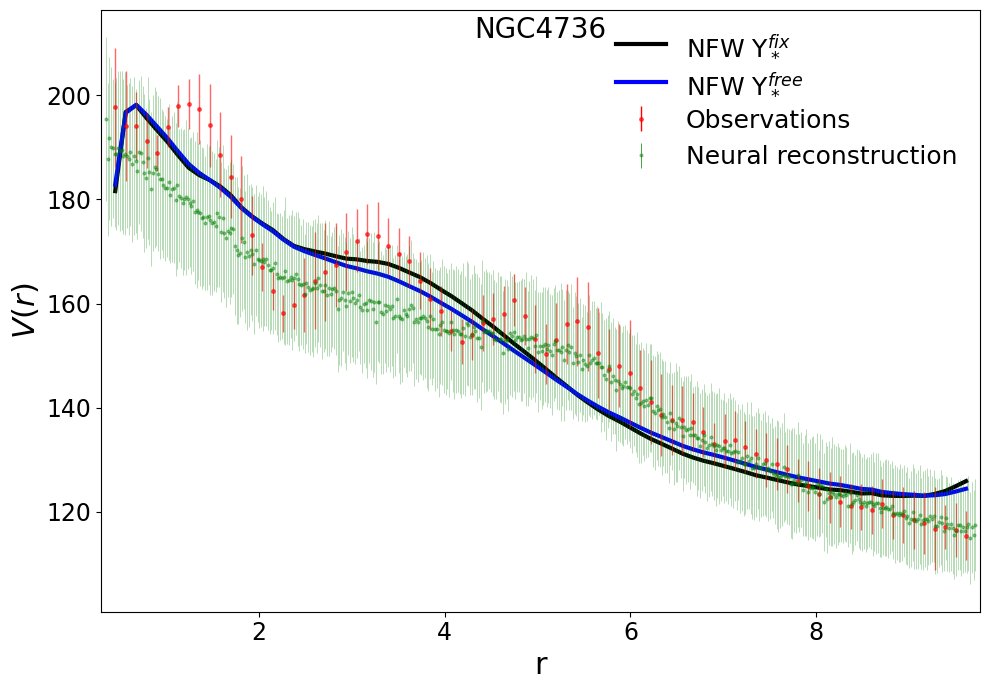

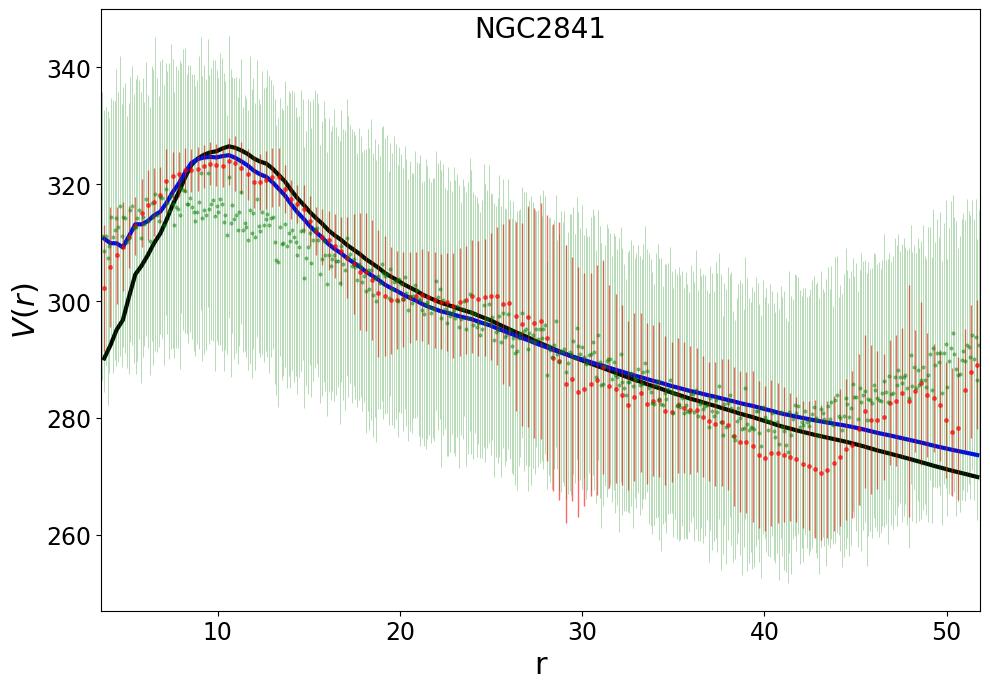

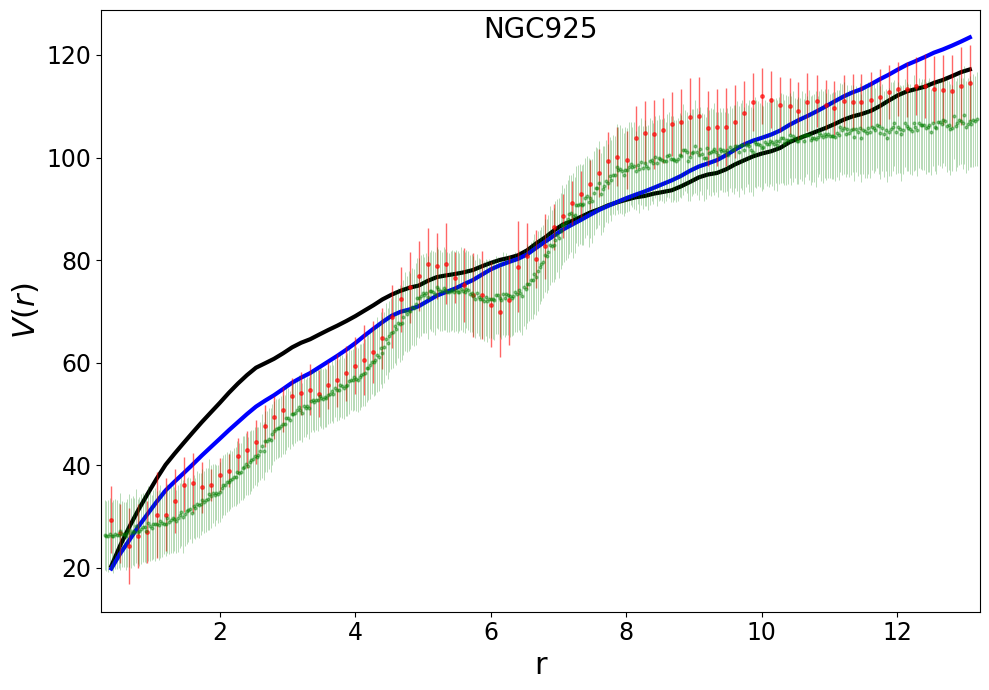

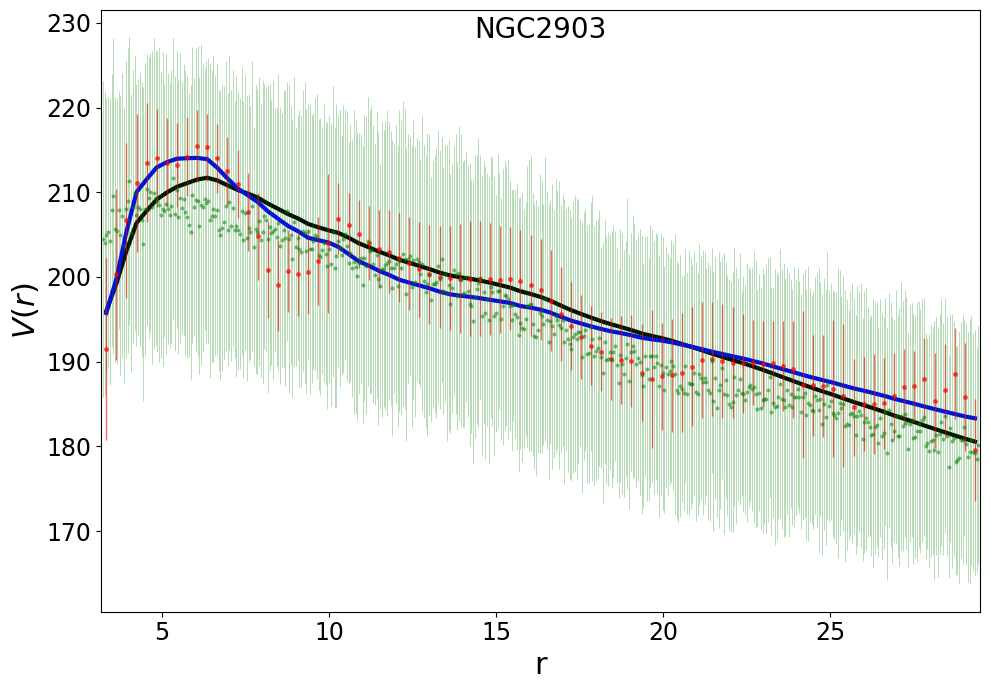

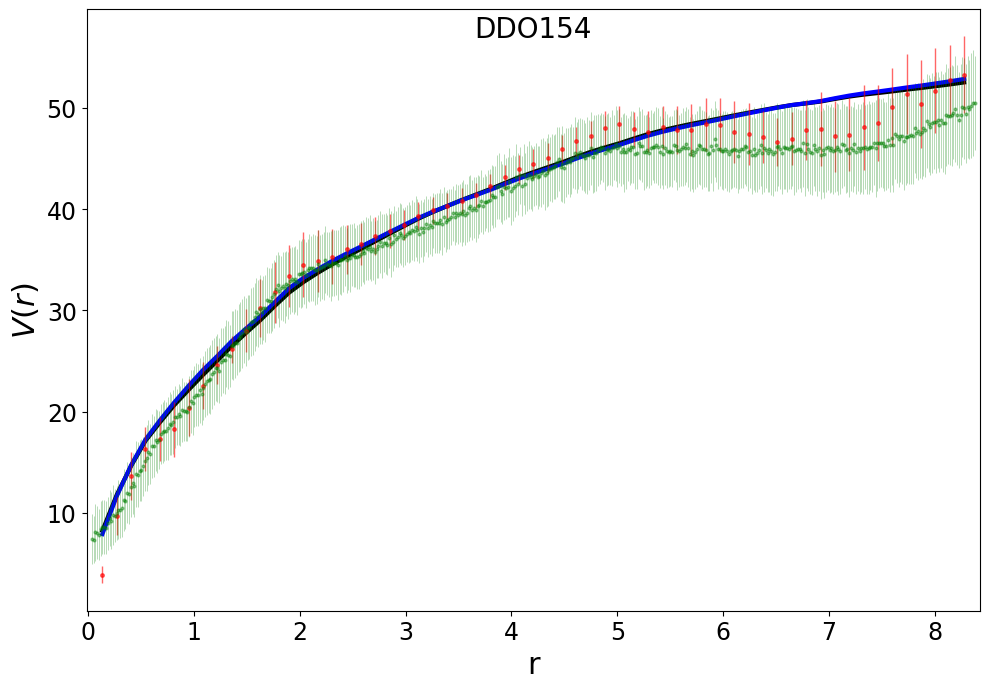

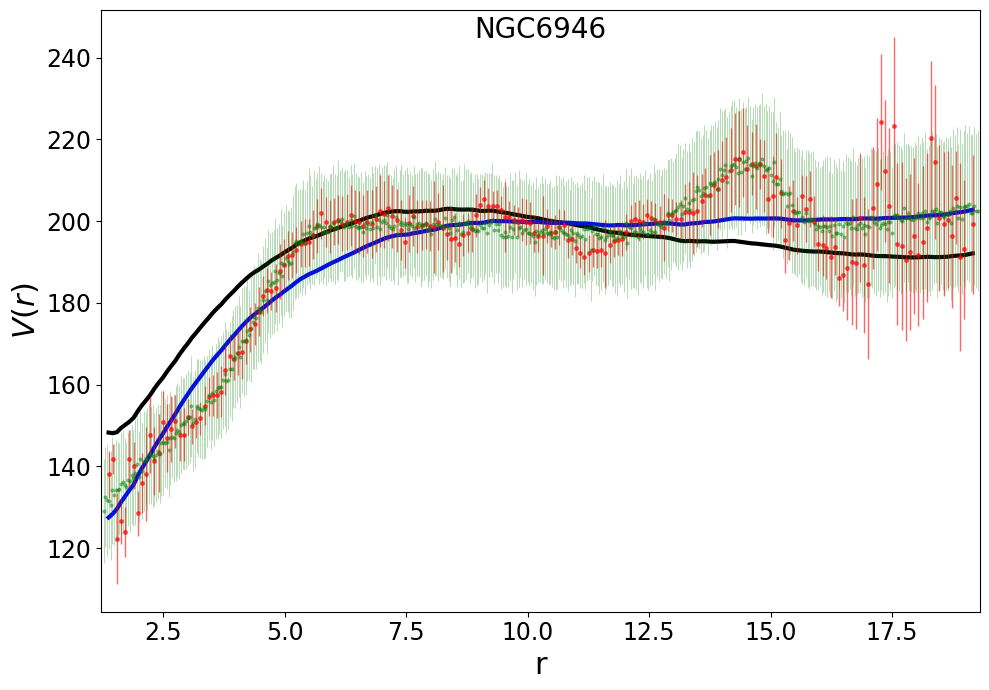

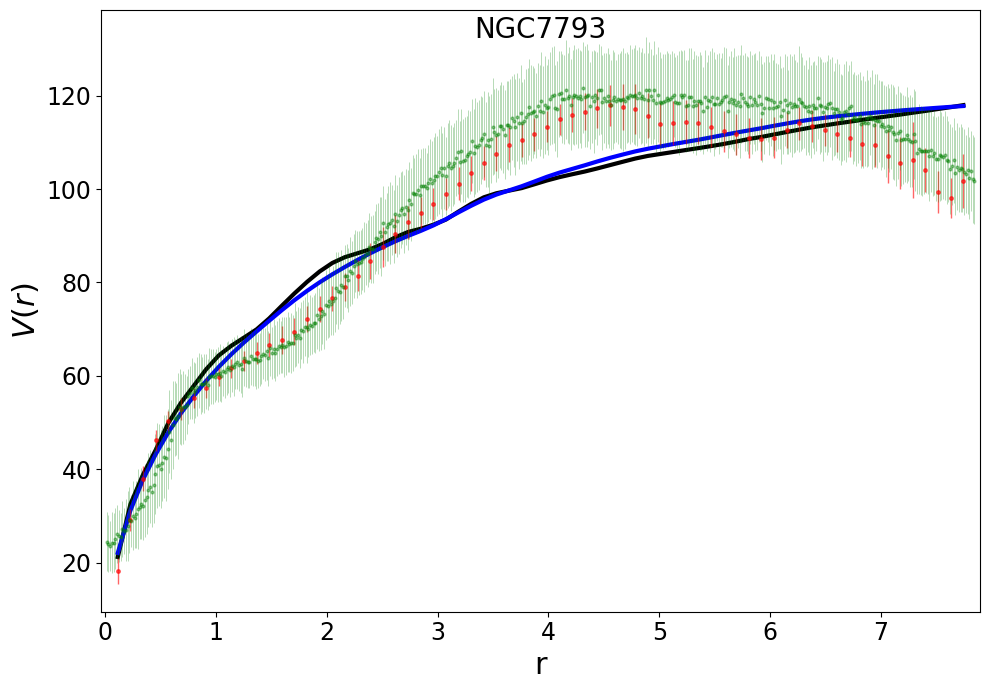

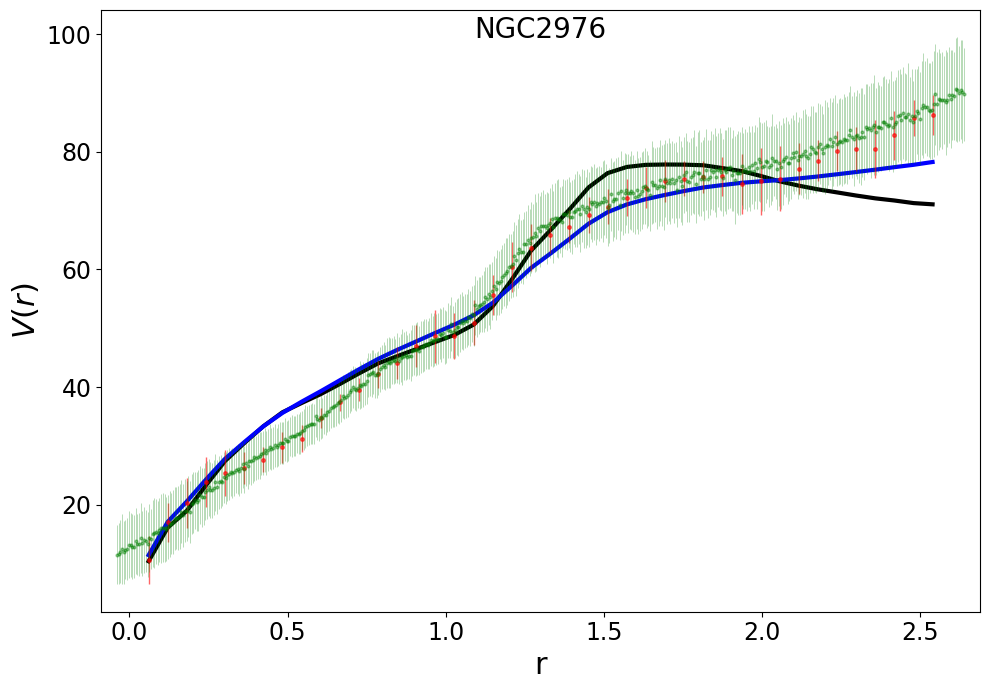

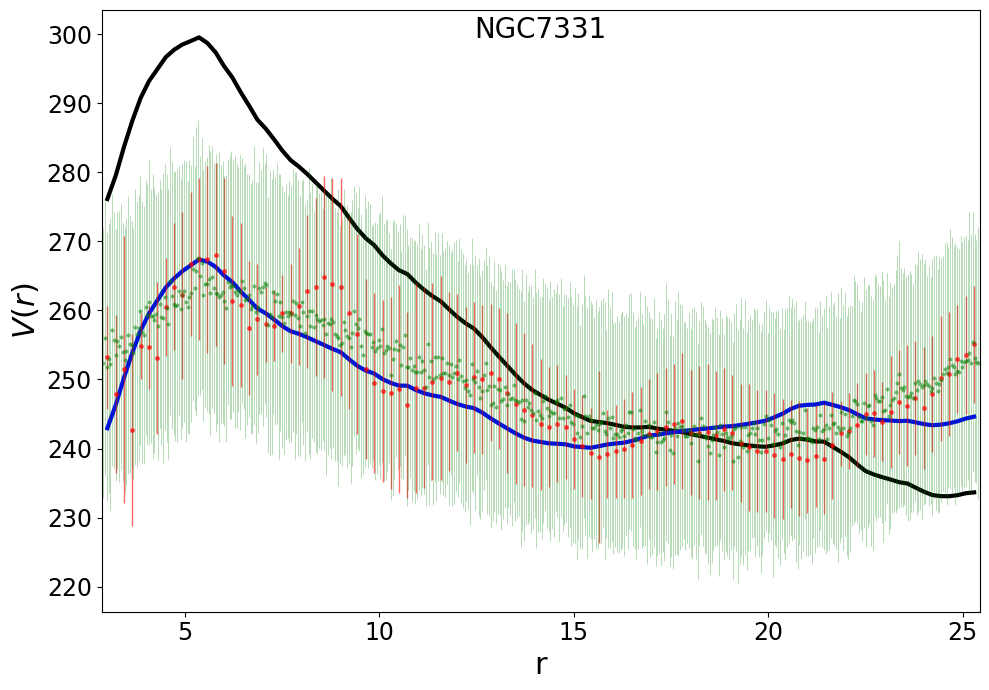

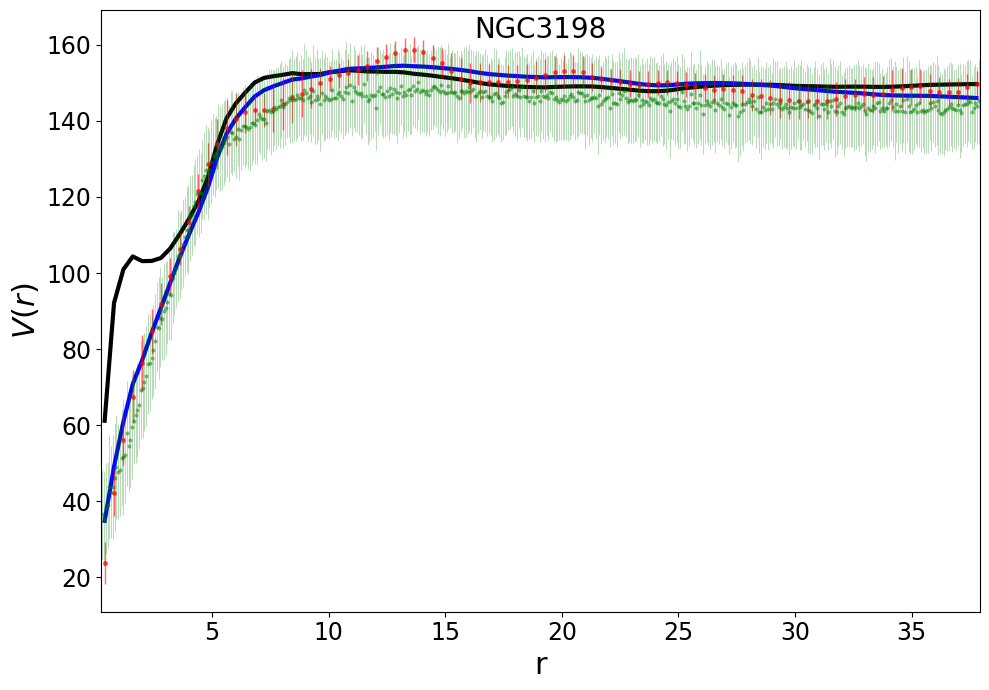

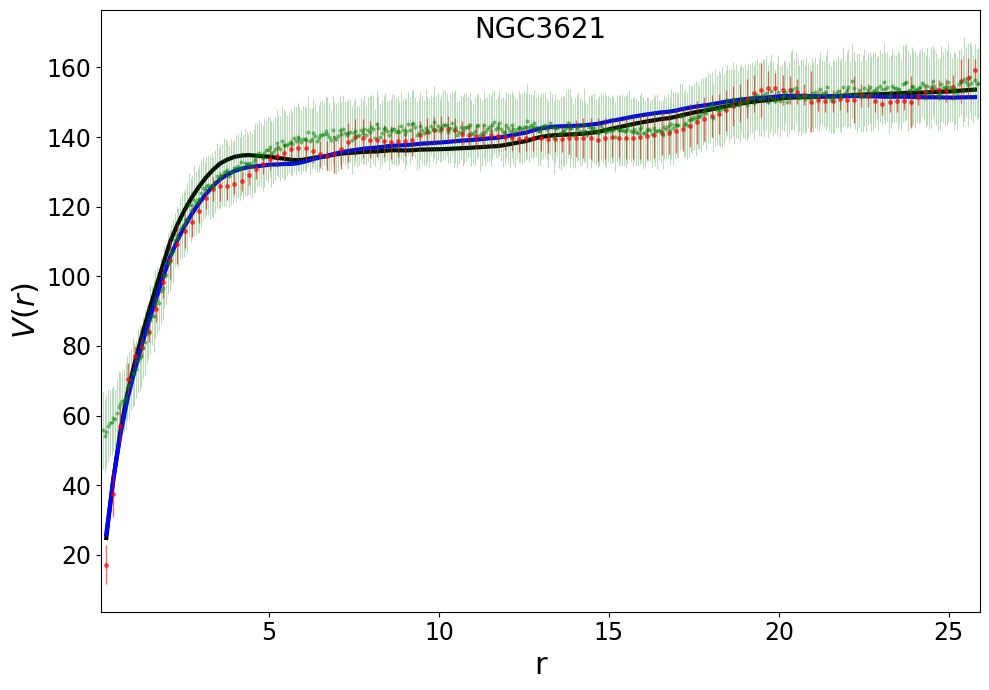

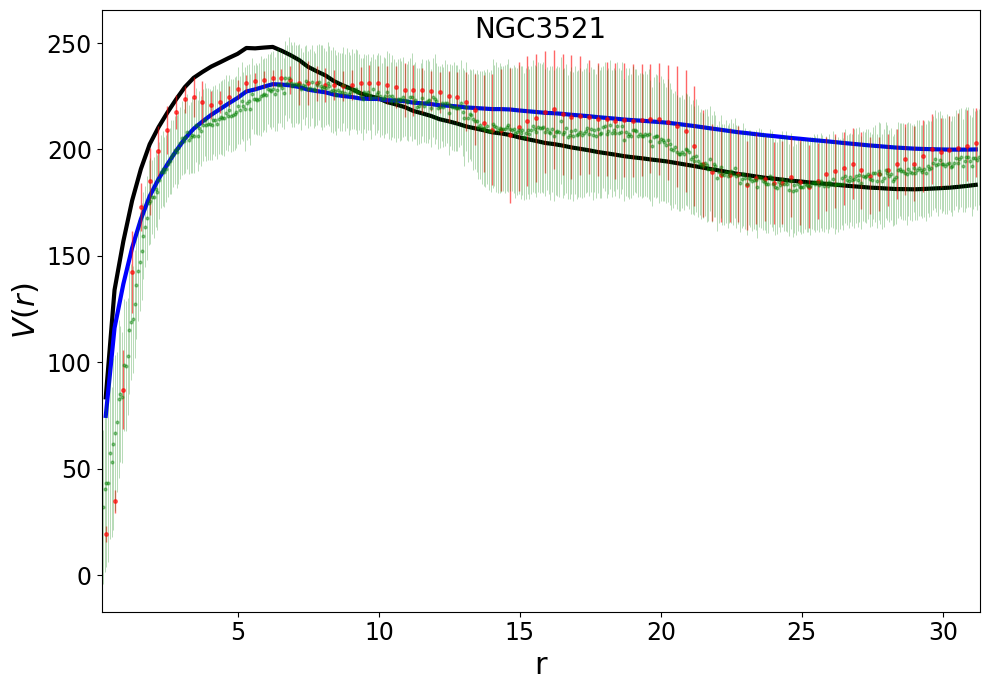

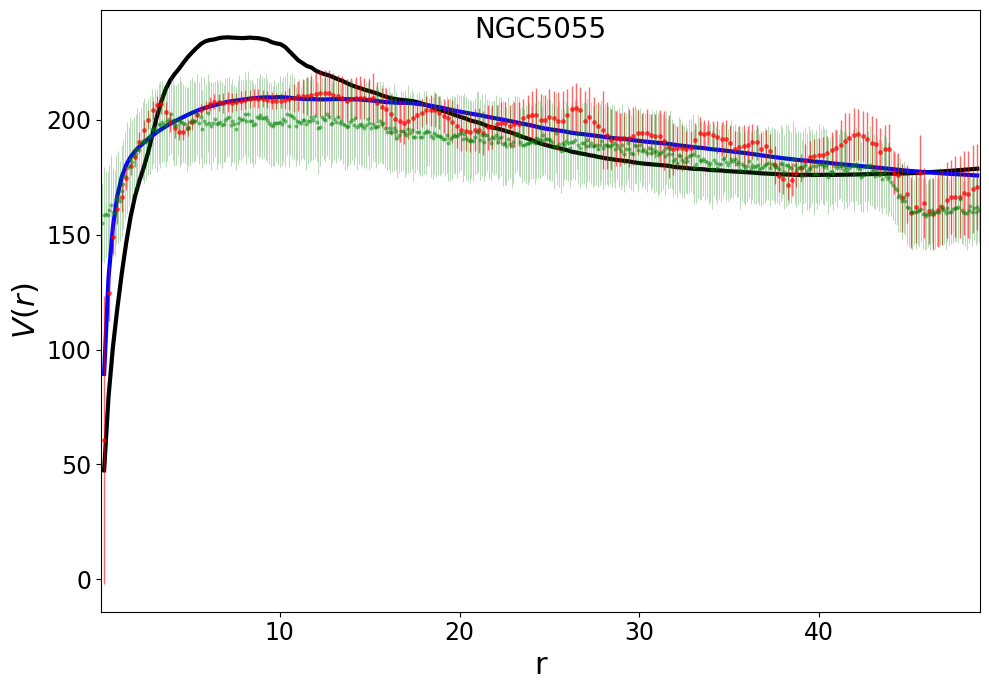

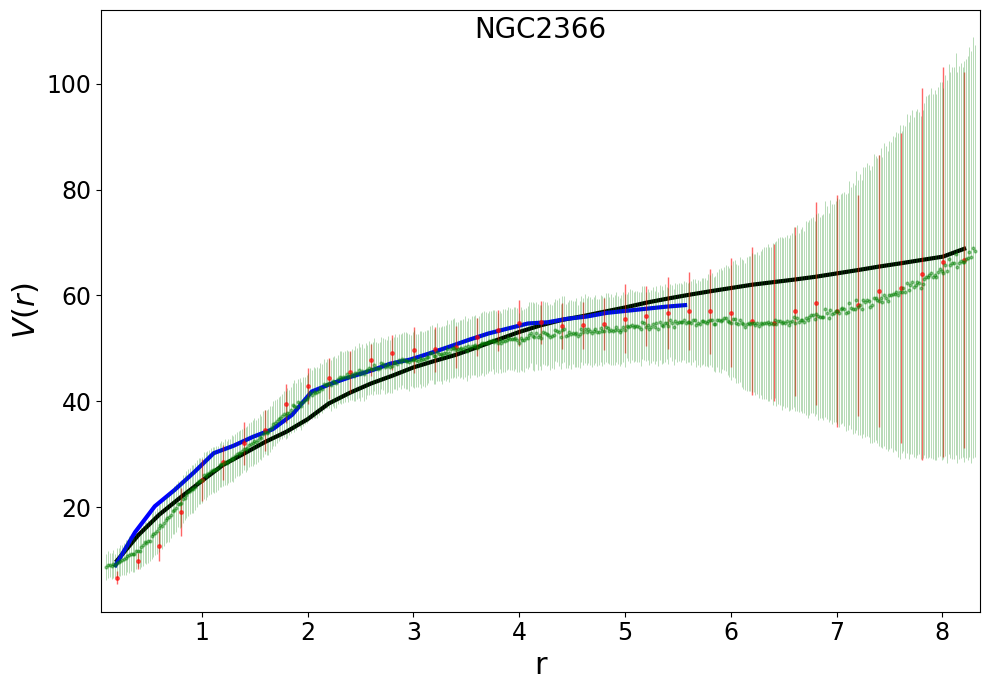

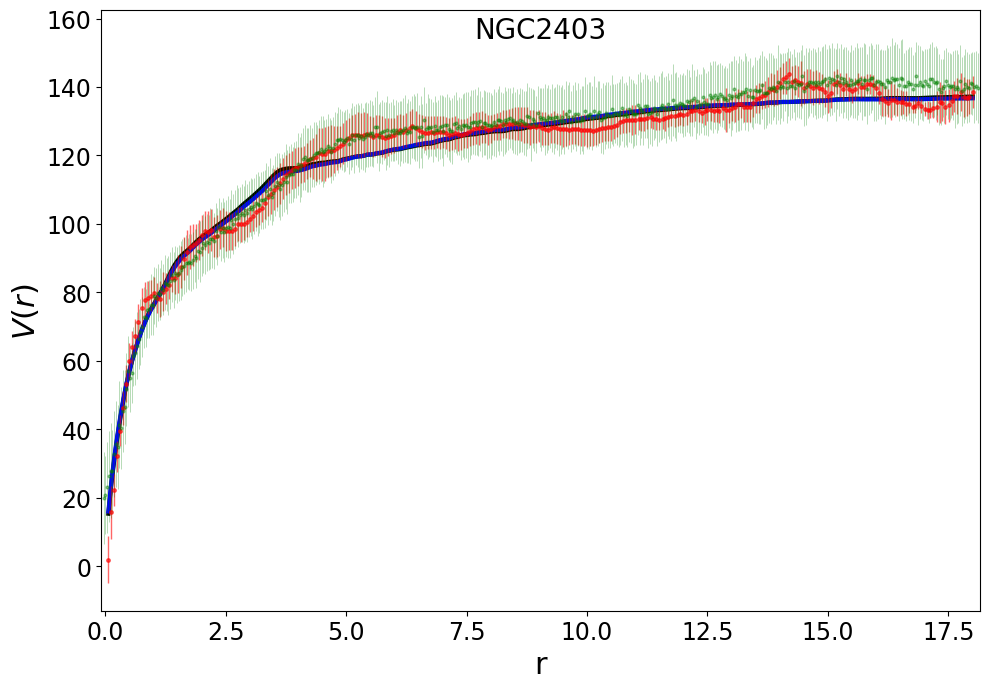

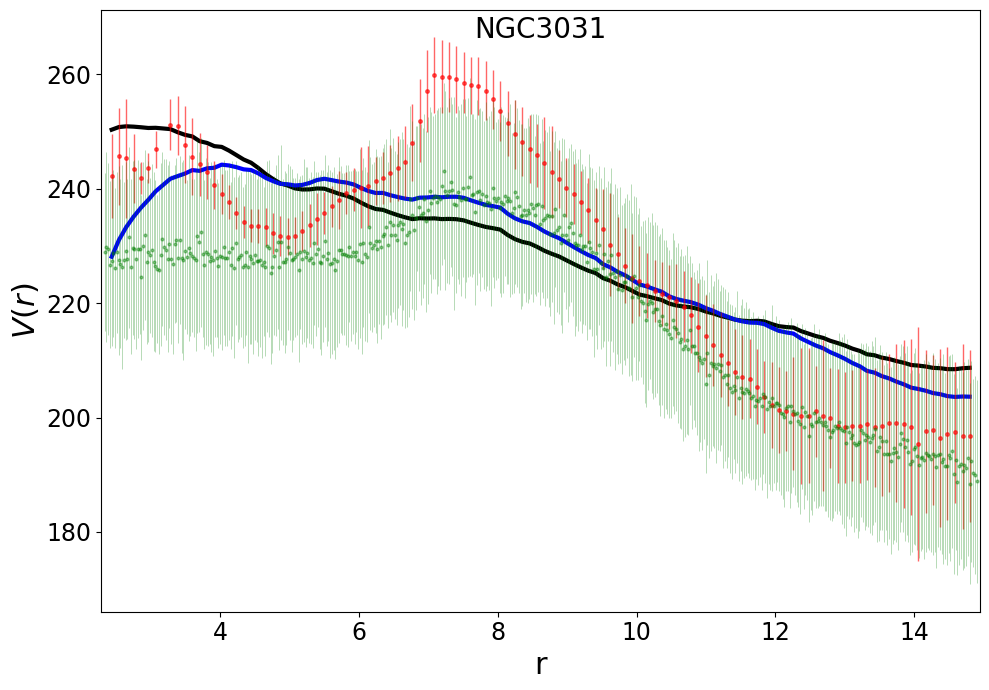

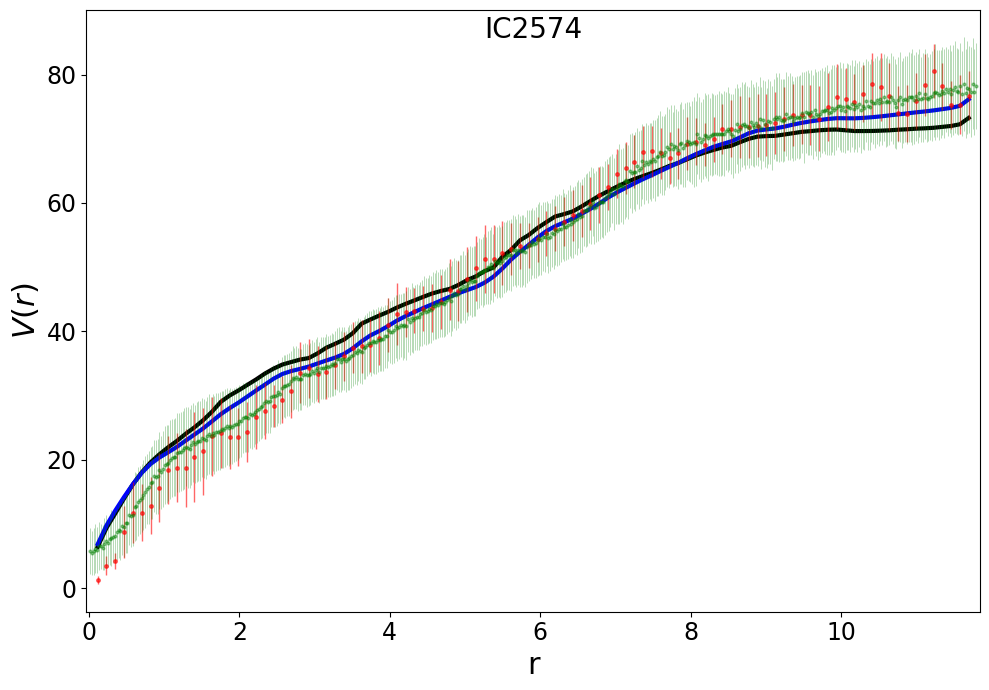

In [9]:
history_all = []

# for idx, file in enumerate(files[:1]):
for idx, root in enumerate(roots):
    print("Model {}/{}".format(idx+1, len(roots)))
    print("-"*10)
    print(root)
    
    history_ind = {}
    
    data = np.loadtxt(dir_name+root+".NFW.fix.REV.dat", skiprows=12)   
    
    df = pd.DataFrame(data, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    
#     data_free = np.loadtxt(dir_name+root_name(files[idx])+".NFW.free.REV.dat", skiprows=12)
    data_free = np.loadtxt(dir_name+root+".NFW.free.REV.dat", skiprows=12)
    df_free = pd.DataFrame(data_free, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    N = len(df.values)
    df = df[['Radius', 'vobs','err_vobs', 'Vt']]


    randomize = np.random.permutation(N)
    data = df.values[randomize]

    z = data[:,0]
    y = data[:,1:3]
    
    scalerz = StandardScaler()
    scalerz.fit(z.reshape(-1,1))
    # apply transform
    z = scalerz.transform(z.reshape(-1,1))
    
    split = 0.8
    ntrain = int(split * len(z))
    indx = [ntrain]
    z_train, z_test = np.split(z, indx)
    y_train, y_test = np.split(y, indx)
    
    print("X_train shape: {} | y_train shape: {} | x_val shape: {} | y_val shape: {}".format(np.shape(z_train), 
                                                                                             np.shape(y_train), 
                                                                                             np.shape(z_test), 
                                                                                             np.shape(y_test)))

        
    model = tf.keras.models.load_model('models/{}.h5'.format(root), custom_objects={'MCDropout': MCDropout})


    # Generate test data
    test_batch_size = 500
    # x_test = np.random.uniform(0, 2., test_batch_size)
    x_test = np.linspace(min(df['Radius'].values)-0.1, max(df['Radius'].values)+0.1, test_batch_size)

    mc_dropout_num = 100  # Run Dropout 100 times
    predictions = np.zeros((mc_dropout_num, test_batch_size, 2))
    for i in range(mc_dropout_num):
        predictions[i] = model.predict(scalerz.transform(x_test.reshape(-1,1)))

    # get mean results and its varience
    prediction_mc_dropout = np.mean(predictions, axis=0)
    std_mc_dropout = np.std(predictions, axis=0)
    
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    overlapping = 0.6
    # Plotting
    plt.figure(figsize=(10, 7), dpi=100)
    sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)

    plt.plot(df['Radius'].values, df['Vt'].values, color='black', linewidth=3, label='NFW $\\Upsilon_*^{fix}$',alpha=1)
    
    plt.plot(df_free['Radius'].values, df_free['Vt'].values, color='blue', linewidth=3, label='NFW $\\Upsilon_*^{free}$', alpha=1)

    plt.errorbar(df['Radius'].values, df['vobs'].values, yerr=df['err_vobs'].values, fmt='.', 
                 color='red', elinewidth=1, ecolor='red', markersize=5, label='Observations', alpha=overlapping)

    plt.errorbar(x_test, prediction_mc_dropout[:,0], yerr=sigma, markersize=2, fmt='o', 
                 ecolor='green', capthick=2, elinewidth=0.5, alpha=overlapping-0.2, c='green',
                 label='Neural reconstruction')
    

    plt.ylabel("$V(r)$", fontsize=22)
    plt.xlabel("r", fontsize=22)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    
    plt.title(root_name(files[idx]), y=0.94, fontsize=20)

    if idx == 0:
        leg = plt.legend(fontsize=18, loc='upper right', framealpha=0)
#         leg = plt.legend()
        for lh in leg.legendHandles: 
            lh.set_alpha(1)

    plt.xlim(min(df['Radius'].values)-0.15, max(df['Radius'].values)+0.15)
    plt.tight_layout()
        
    plt.savefig("figures/load_neural_reconstruction_RC_{}.png".format(idx+1), dpi=100)
          
    print("-"*10)


In [14]:
history_all = []
mse_free_vs_neural = [] 
mse_free_vs_data = []
mse_fix_vs_neural = [] 
mse_fix_vs_data = []
mse_neural_vs_data = []


for idx, root in enumerate(roots):
    print("Model {}/{}".format(idx+1, len(roots)))
    print("-"*10)
    
    history_ind = {}
    
    data = np.loadtxt(dir_name+root+".NFW.fix.REV.dat", skiprows=12) 
    df = pd.DataFrame(data, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    
    data_free = np.loadtxt(dir_name+root+".NFW.free.REV.dat", skiprows=12)
    df_free = pd.DataFrame(data_free, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    N = len(df.values)
    df = df[['Radius', 'vobs','err_vobs', 'Vt']]
    df_free = df_free[['Radius', 'vobs','err_vobs', 'Vt']]


    randomize = np.random.permutation(N)
    data = df.values[randomize]

    z = data[:,0]
    y = data[:,1:3]
    
    scalerz = StandardScaler()
    scalerz.fit(z.reshape(-1,1))
    # apply transform
    z = scalerz.transform(z.reshape(-1,1))
    
    split = 0.8
    ntrain = int(split * len(z))
    indx = [ntrain]
    z_train, z_test = np.split(z, indx)
    y_train, y_test = np.split(y, indx)
    
        
    model = tf.keras.models.load_model('models/{}.h5'.format(root), custom_objects={'MCDropout': MCDropout})


    # Generate test data
    test_batch_size_fix = len(df['Radius'].values)
    test_batch_size_free = len(df_free['Radius'].values)

    mc_dropout_num = 100  # Run Dropout 100 times
    predictions_fix = np.zeros((mc_dropout_num, test_batch_size_fix, 2))
    predictions_free = np.zeros((mc_dropout_num, test_batch_size_free, 2))
    for i in range(mc_dropout_num):
        predictions_fix[i] = model.predict(scalerz.transform(df['Radius'].values.reshape(-1,1)))
        predictions_free[i] = model.predict(scalerz.transform(df_free['Radius'].values.reshape(-1,1)))

    # get mean results and its varience
    prediction_mc_dropout_fix = np.mean(predictions_fix, axis=0)
    std_mc_dropout_fix = np.std(predictions_fix, axis=0)
    
    prediction_mc_dropout_free = np.mean(predictions_free, axis=0)
    std_mc_dropout_free = np.std(predictions_free, axis=0)
    
    mse_fix_vs_data.append(mean_squared_error(df['Vt'].values, df['vobs'].values))
    mse_free_vs_data.append(mean_squared_error(df_free['Vt'].values, df_free['vobs'].values))
    mse_neural_vs_data.append(mean_squared_error(prediction_mc_dropout_fix[:,0], df['vobs'].values))
    
    mse_fix_vs_neural.append(mean_squared_error(df['Vt'].values, prediction_mc_dropout_fix[:,0]))    
    mse_free_vs_neural.append(mean_squared_error(df_free['Vt'].values, prediction_mc_dropout_free[:,0]))

    
    print("-"*10)


Model 1/17
----------
3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step
----------
Model 2/17
----------
5/5 [==============================] - 0s 878us/step


5/5 [==============================] - 0s 1ms/step
----------
Model 3/17
----------
3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step
----------
Model 4/17
----------
3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step
----------
Model 5/17
----------
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step
----------
Model 6/17
----------
7/7 [==============================] - 0s 1000us/step


7/7 [==============================] - 0s 1ms/step
----------
Model 7/17
----------
3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step
----------
Model 8/17
----------
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step
----------
Model 9/17
----------
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
----------
Model 10/17
----------
3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step
----------
Model 11/17
----------
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
----------
Model 12/17
----------
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
----------
Model 13/17
----------
7/7 [==============================] - 0s 928us/step


7/7 [==============================] - 0s 893us/step
----------
Model 14/17
----------
1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step
----------
Model 15/17
----------
9/9 [==============================] - 0s 881us/step


9/9 [==============================] - 0s 945us/step
----------
Model 16/17
----------
4/4 [==============================] - 0s 969us/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 946us/step
----------
Model 17/17
----------
4/4 [==============================] - 0s 979us/step


4/4 [==============================] - 0s 1ms/step
----------


In [33]:
for idx, root in enumerate(roots):   
    print('{} & & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \ \ '.format(roots[idx],
                                                                           mse_fix_vs_data[idx], 
                                                                           mse_free_vs_data[idx],
                                                                           mse_neural_vs_data[idx], 
                                                                           mse_fix_vs_neural[idx], 
                                                                           mse_free_vs_neural[idx]
                                                                                 ))
    print("\hline")
    
print("Means:")
print('{:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f}'.format(np.mean(mse_fix_vs_data), 
                                                          np.mean(mse_free_vs_data),
                                                          np.mean(mse_neural_vs_data), 
                                                          np.mean(mse_fix_vs_neural), 
                                                          np.mean(mse_free_vs_neural)
                                                         ))

NGC4736 & & 46.66 & 43.68 & 42.66 & 37.19 & 31.55 \ \ 
\hline
NGC2841 & & 32.43 & 21.50 & 27.68 & 62.65 & 32.32 \ \ 
\hline
NGC925 & & 66.52 & 34.65 & 25.11 & 72.61 & 48.41 \ \ 
\hline
NGC2903 & & 10.04 & 6.85 & 17.38 & 11.89 & 13.07 \ \ 
\hline
DDO154 & & 2.83 & 2.91 & 3.50 & 6.78 & 6.97 \ \ 
\hline
NGC6946 & & 119.78 & 51.66 & 26.71 & 105.19 & 28.51 \ \ 
\hline
NGC7793 & & 59.74 & 53.47 & 21.39 & 89.33 & 74.62 \ \ 
\hline
NGC2976 & & 25.88 & 11.15 & 3.10 & 32.65 & 16.48 \ \ 
\hline
NGC7331 & & 309.23 & 19.78 & 12.64 & 294.04 & 17.79 \ \ 
\hline
NGC3198 & & 100.39 & 7.98 & 26.03 & 117.61 & 27.66 \ \ 
\hline
NGC3621 & & 12.24 & 10.17 & 22.10 & 22.14 & 21.06 \ \ 
\hline
NGC3521 & & 335.01 & 225.37 & 62.68 & 292.89 & 192.91 \ \ 
\hline
NGC5055 & & 239.95 & 42.84 & 124.15 & 389.89 & 105.98 \ \ 
\hline
NGC2366 & & 15.75 & 7.60 & 2.97 & 17.20 & 6.08 \ \ 
\hline
NGC2403 & & 11.56 & 11.35 & 12.34 & 13.68 & 13.13 \ \ 
\hline
NGC3031 & & 144.49 & 103.98 & 105.42 & 159.44 & 98.33 \ \ 
\hline
IC2